<a href="https://colab.research.google.com/github/gamer-217/ML/blob/main/11_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          d1        d2
0   0.476743 -7.083684
1 -12.464627 -0.875787
2  -8.342720 -6.659578
3  -8.483402 -4.691798
4 -10.286264 -0.338606


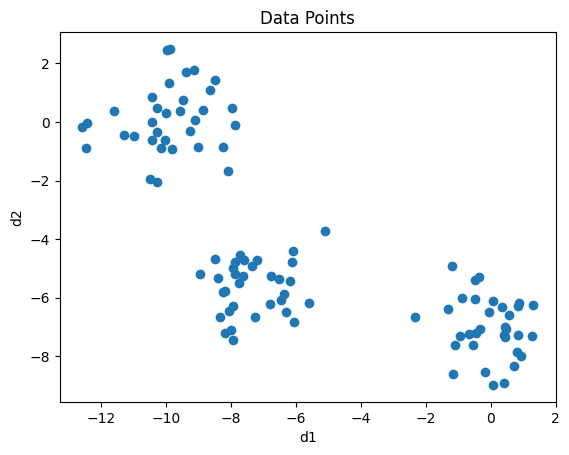

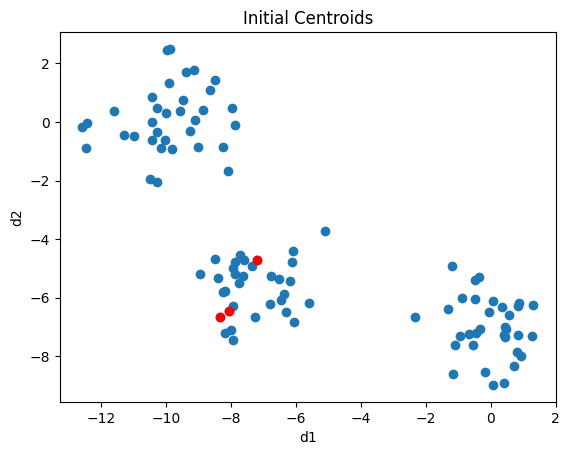

[[8.57263493 8.0503536  8.82965388]
 [7.09894529 6.50208395 7.10227826]
 [0.33998657 2.24619905 0.        ]
 [1.80849628 1.2661964  1.97280282]
 [6.50278866 5.34561976 6.61302179]]
          d1        d2  cluster
0   0.476743 -7.083684        1
1 -12.464627 -0.875787        1
2  -8.342720 -6.659578        2
3  -8.483402 -4.691798        1
4 -10.286264 -0.338606        1


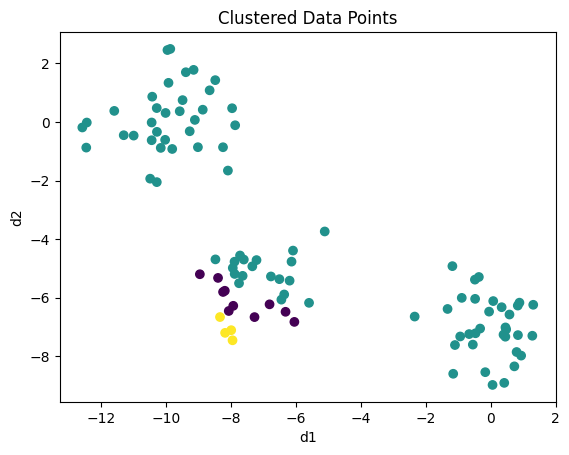

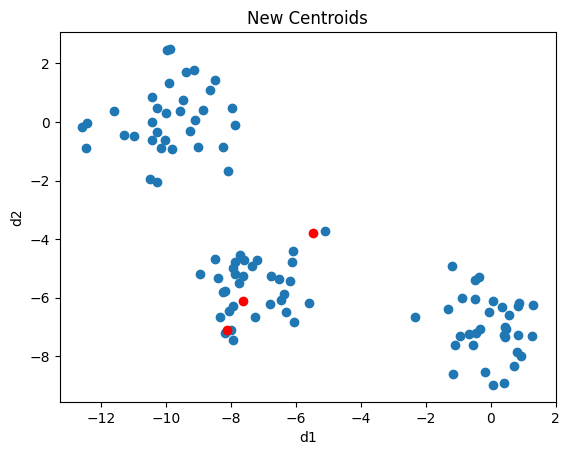

In [1]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# 데이터 생성 및 준비
# make_blobs() 함수로 100개의 샘플을 3개의 중심으로 나누어 생성
# make_blobs 함수를 사용하여 데이터를 생성하고, 이를 두 개의 변수로 언패킹
#파이썬 함수는 여러 값을 반환할 수 있으며, 이를 튜플 형태로 반환합니다. 반환된 튜플은 여러 개의 변수로 언패킹할 수 있습니다. make_blobs 함수는 두 개의 값을 반환하며, 이를 각각 data와 cls 변수에 할당할 수 있습니다.
data, cls = make_blobs(n_samples=100, centers=3, n_features=2, random_state=9)
# 데이터프레임으로 변환
points = pd.DataFrame(data, columns=["d1", "d2"])

# 데이터 확인
print(points.head())

# 데이터 시각화
plt.scatter(points["d1"], points["d2"])
plt.title('Data Points')
plt.xlabel('d1')
plt.ylabel('d2')
plt.show()

# 임의의 점 3개를 선택하여 초기 클러스터 중심으로 설정
np.random.seed(0)
centroids = points.sample(3, random_state=0).values

# 초기 클러스터 중심과 데이터 포인트를 산점도로 시각화
# matplotlib 라이브러리를 사용하여 시각화를 수행합니다.
# import matplotlib.pyplot as plt

# 데이터 포인트를 산점도로 그립니다.
# points 데이터프레임의 "d1" 열을 x축으로, "d2" 열을 y축으로 설정합니다.
plt.scatter(points["d1"], points["d2"])

# 초기 클러스터 중심을 산점도로 그립니다.
# centroids 배열의 첫 번째 열을 x축으로, 두 번째 열을 y축으로 설정합니다.
# 'c' 매개변수를 'red'로 설정하여 클러스터 중심을 빨간색으로 표시합니다.
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

# 그래프의 제목을 설정합니다.
plt.title('Initial Centroids')

# x축 레이블을 설정합니다.
plt.xlabel('d1')

# y축 레이블을 설정합니다.
plt.ylabel('d2')

# 설정한 모든 내용을 시각화하여 화면에 출력합니다.
plt.show()


# 각 점에 대하여 클러스터 중심과의 거리를 계산
dist = sp.spatial.distance.cdist(points, centroids, "euclidean")

# 거리 확인
print(dist[0:5, :])

# 각 점을 가장 가까운 클러스터 중심에 할당
cidx = np.argmin(dist, axis=1)

# 클러스터 할당 결과를 데이터프레임에 추가
points["cluster"] = np.array(cidx)

# 클러스터 할당 결과 확인
print(points.head())

# 클러스터 할당 결과를 시각화
plt.scatter(points["d1"], points["d2"], c=points["cluster"])
plt.title('Clustered Data Points')
plt.xlabel('d1')
plt.ylabel('d2')
plt.show()

# 각 클러스터의 새로운 중심을 계산
centroids2 = points.groupby("cluster").mean().values

# 새로 계산한 클러스터 중심과 데이터 포인트를 산점도로 시각화
plt.scatter(points["d1"], points["d2"])
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red')
plt.title('New Centroids')
plt.xlabel('d1')
plt.ylabel('d2')
plt.show()